In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# https://github.com/parsing-science/pymc3_quickstart_guide

In [2]:
# from https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers

In [ ]:
# https://gist.github.com/twiecki/14694749b5f85e89b246

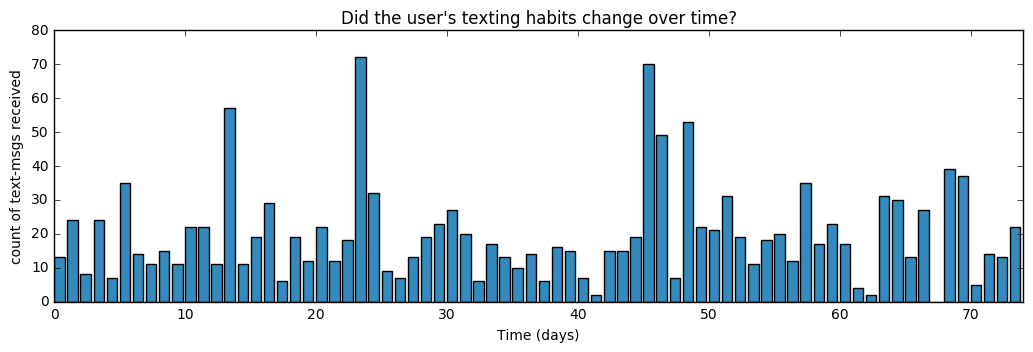

In [3]:
url = 'https://raw.githubusercontent.com/CamDavidsonPilon/'
url += 'Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/master/'
url += 'Chapter1_Introduction/data/txtdata.csv'
count_data = pd.read_table(url, header = None).iloc[:, 0].values
n_count_data = len(count_data)

plt.figure(figsize = (12.5, 3.5))
plt.bar(np.arange(n_count_data), count_data, color ="#348ABD")
plt.xlabel('Time (days)')
plt.ylabel('count of text-msgs received')
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data)
plt.show()

In [5]:
import pymc3 as mc

alpha = 1.0 / count_data.mean()

model = mc.Model()

with model:
    lambda_1 = mc.Exponential('lambda_1', alpha)
    lambda_2 = mc.Exponential('lambda_2', alpha)
    tau = mc.DiscreteUniform('tau', lower = 0, upper = n_count_data)

Applied log-transform to lambda_1 and added transformed lambda_1_log_ to model.
Applied log-transform to lambda_2 and added transformed lambda_2_log_ to model.


In [8]:
np.random.seed(123)
alpha, sigma = 1, 1
beta = [1, 2.5]
size = 100
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2
Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(size) * sigma

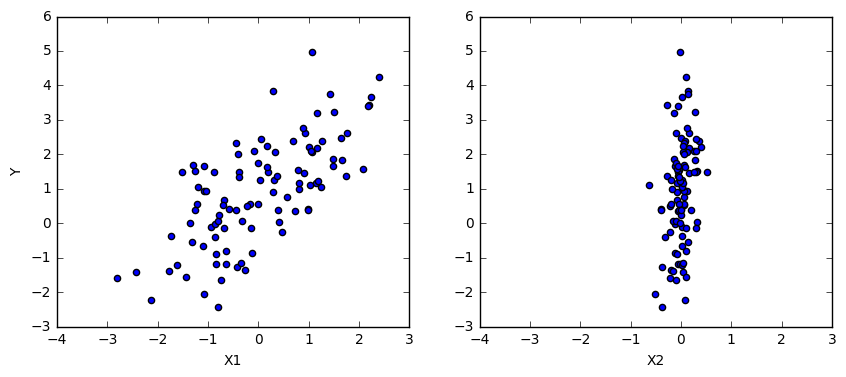

In [9]:
fig, axes = plt.subplots(1, 2, sharex = True, figsize = (10, 4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y')
axes[0].set_xlabel('X1')
axes[1].set_xlabel('X2')

In [10]:
from pymc3 import Model, Normal, HalfNormal


model = Model()

with model:

    # Priors for unknown model parameters
    alpha = Normal('alpha', mu = 0, sd = 10)
    beta = Normal('beta', mu = 0, sd = 10, shape = 2)
    sigma = HalfNormal('sigma', sd = 1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal('Y_obs', mu = mu, sd = sigma, observed = Y)

Applied log-transform to sigma and added transformed sigma_log_ to model.
